In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit

In [2]:
@jit(nopython=True)
def bandit_simulation(n_steps, n_arms, epsilon, alpha):
    true_values = np.zeros(n_arms)
    q_values = np.zeros(n_arms)
    action_counts = np.zeros(n_arms)
    rewards = np.zeros(n_steps)
    optimal_actions = np.zeros(n_steps)

    for step in range(n_steps):
        true_values += 0.01 * np.random.randn(n_arms)

        if np.random.random() < epsilon:
            action = np.random.randint(n_arms)
        else:
            action = np.argmax(q_values)

        reward = np.random.normal(true_values[action], 1)

        action_counts[action] += 1
        q_values[action] += alpha * (reward - q_values[action])

        rewards[step] = reward
        optimal_actions[step] = 1 if action == np.argmax(true_values) else 0

    return rewards, optimal_actions

In [3]:
def run_experiment(n_steps=100000, n_runs=30, n_arms=10, epsilon=0.1, alpha=0.1):
    all_rewards = np.zeros((n_runs, n_steps))
    all_optimal_actions = np.zeros((n_runs, n_steps))

    for run in tqdm(range(n_runs), desc="Running simulations"):
        rewards, optimal_actions = bandit_simulation(n_steps, n_arms, epsilon, alpha)
        all_rewards[run] = rewards
        all_optimal_actions[run] = optimal_actions

    return all_rewards, all_optimal_actions

Running simulations: 100%|██████████| 30/30 [00:03<00:00,  8.52it/s]


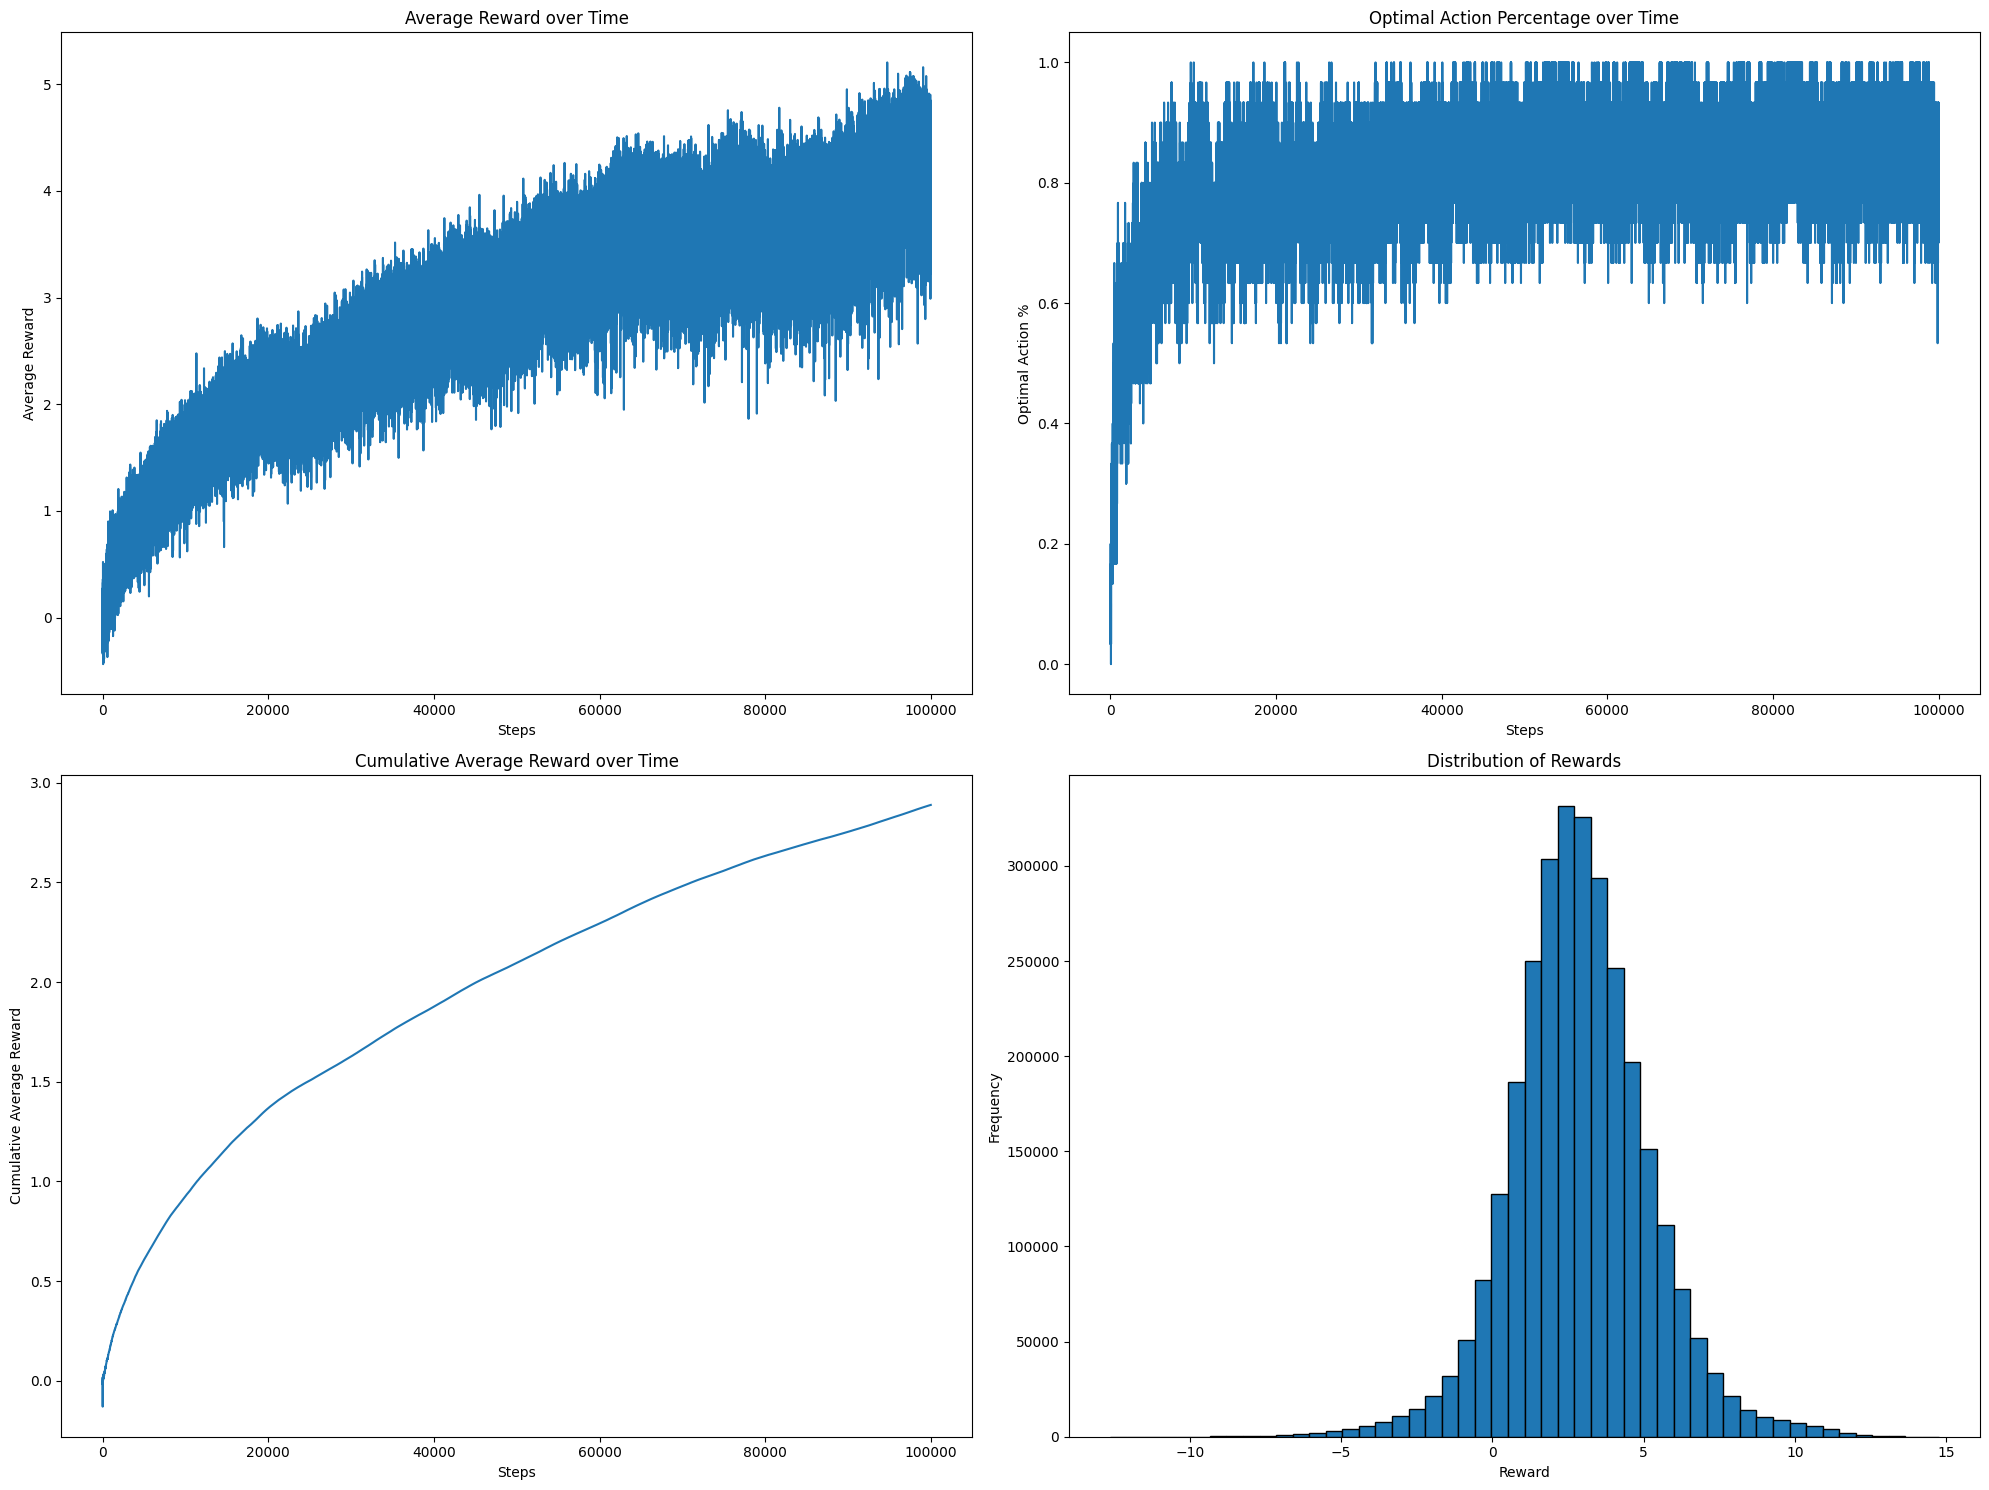

Average reward over all steps: 2.8884
Average optimal action percentage: 82.56%
Final cumulative average reward: 2.8884


In [4]:
n_steps = 100000
n_runs = 30
all_rewards, all_optimal_actions = run_experiment(n_steps, n_runs)

avg_reward = np.mean(all_rewards, axis=0)
avg_optimal_action = np.mean(all_optimal_actions, axis=0)
cumulative_avg_reward = np.cumsum(avg_reward) / (np.arange(n_steps) + 1)

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.plot(avg_reward)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')

plt.subplot(2, 2, 2)
plt.plot(avg_optimal_action)
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.title('Optimal Action Percentage over Time')

plt.subplot(2, 2, 3)
plt.plot(cumulative_avg_reward)
plt.xlabel('Steps')
plt.ylabel('Cumulative Average Reward')
plt.title('Cumulative Average Reward over Time')

plt.subplot(2, 2, 4)
plt.hist(all_rewards.flatten(), bins=50, edgecolor='black')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Rewards')

plt.tight_layout()
plt.show()

print(f"Average reward over all steps: {np.mean(avg_reward):.4f}")
print(f"Average optimal action percentage: {np.mean(avg_optimal_action) * 100:.2f}%")
print(f"Final cumulative average reward: {cumulative_avg_reward[-1]:.4f}")